In [645]:
import requests
import json
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math
import statsmodels.api as sm 
import scipy.stats as scs 
from scipy.fftpack import fft,ifft

In [104]:
#找無ESD
ETF_list=['VTI', 'VO', 'VB', 'IWC', 'VEA', 'VWO', 'GWX', 'EWX', 'BND', 'TIP', 'BWX', 'VNQ', 'RWX', 'IGF', 'TREE',
'DBA', 'DBE', 'DBB', 'DBP']

In [106]:
names = locals()
for etf in ETF_list:
    site = "https://query1.finance.yahoo.com/v7/finance/download/%s?period1=1431388800&period2=1589241600&interval=1d&events=history"%etf
    response = requests.get(site)
    names["df_%s"%etf] = pd.read_csv(StringIO(response.text))


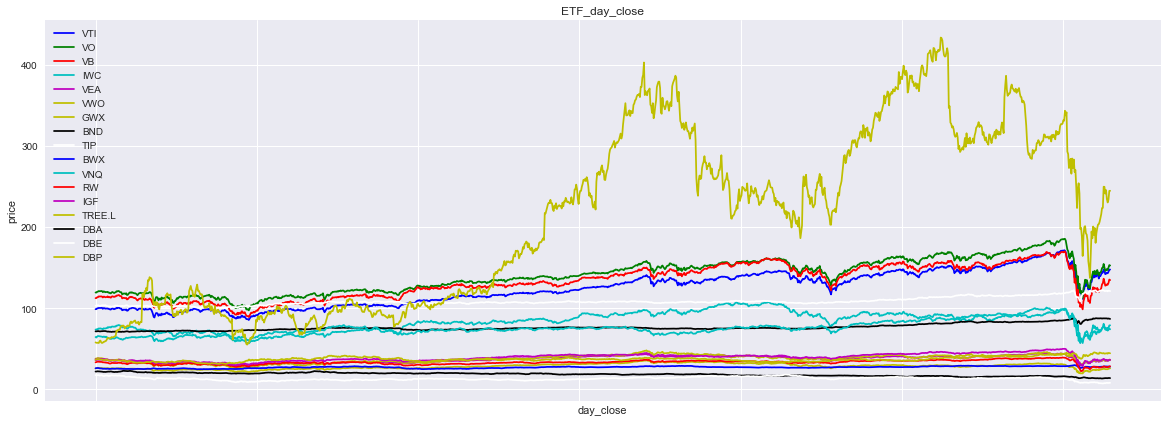

In [676]:
"""
觀察一下這19檔
"""
colors = "bgrcmykw"
plt.style.use('seaborn')
plt.figure(figsize=(20, 7)) 
plt.plot(df_VTI[r"Adj Close"], 'b', label='VTI')
plt.plot(df_VO[r"Adj Close"], 'g', label='VO')
plt.plot(df_VB[r"Adj Close"], 'r', label='VB')
plt.plot(df_IWC[r"Adj Close"], 'c', label='IWC')
plt.plot(df_VEA[r"Adj Close"], 'm', label='VEA')
plt.plot(df_VWO[r"Adj Close"], 'y', label='VWO')
plt.plot(df_GWX[r"Adj Close"], 'y', label='GWX')
plt.plot(df_BND[r"Adj Close"], 'k', label='BND')
plt.plot(df_TIP[r"Adj Close"], 'w', label='TIP')
plt.plot(df_BWX[r"Adj Close"], 'b', label='BWX')
plt.plot(df_VNQ[r"Adj Close"], 'c', label='VNQ')
plt.plot(df_RWX[r"Adj Close"], 'r', label='RW')
plt.plot(df_IGF[r"Adj Close"], 'm', label='IGF')
plt.plot(df_TREE[r"Adj Close"], 'y', label='TREE.L')
plt.plot(df_DBA[r"Adj Close"], 'k', label='DBA')
plt.plot(df_DBE[r"Adj Close"], 'w', label='DBE')
plt.plot(df_DBP[r"Adj Close"], 'y', label='DBP')

plt.tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)
plt.ylabel('price')
plt.xlabel('day_close')
plt.legend(loc="best")
plt.title('ETF_day_close')
plt.show()

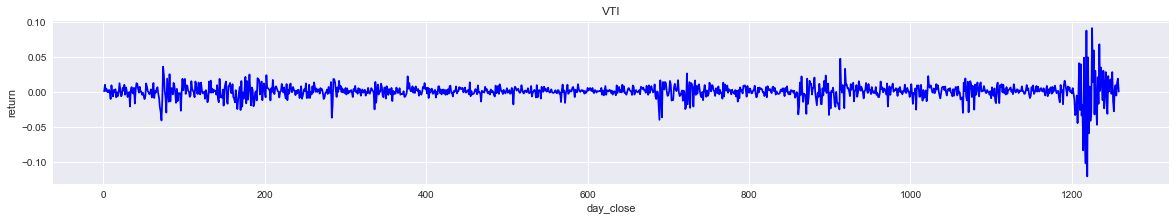

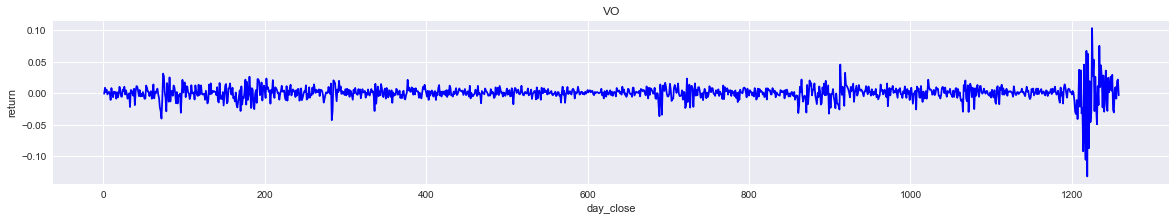

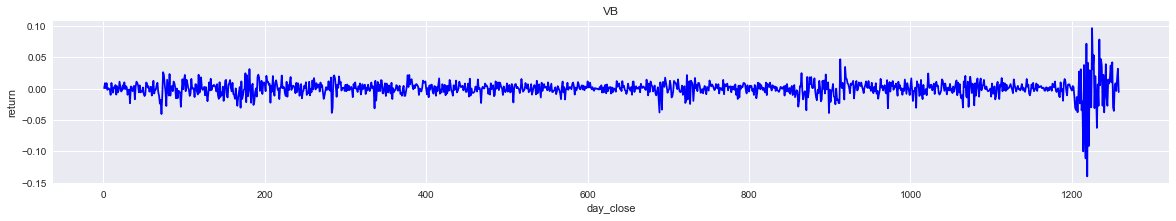

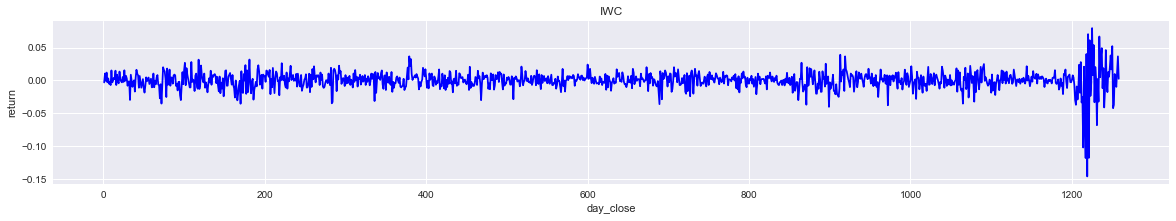

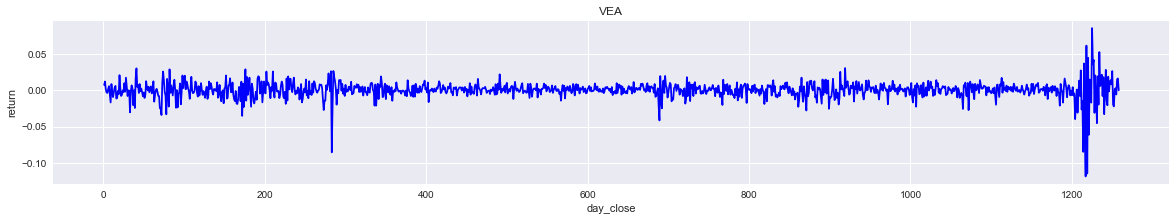

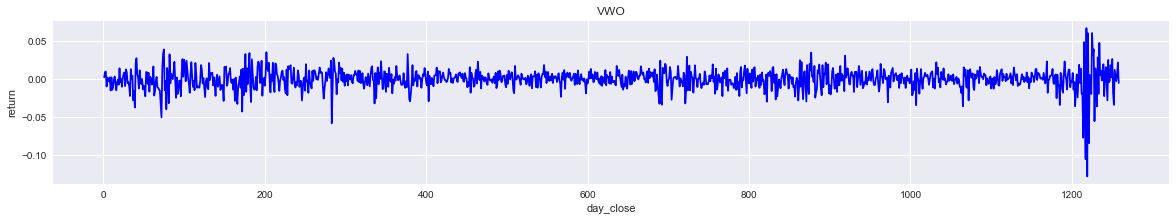

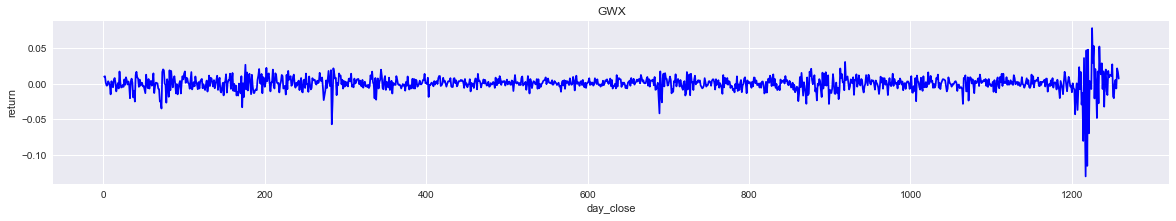

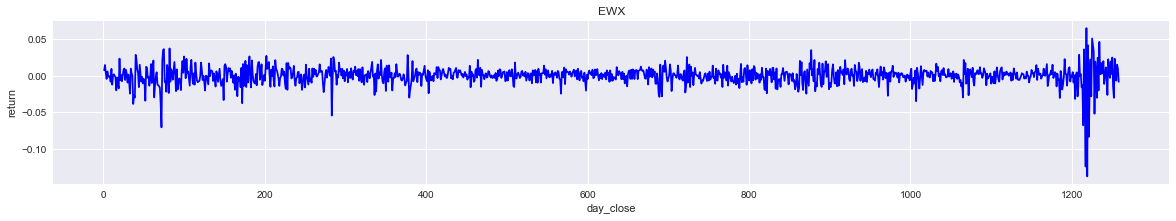

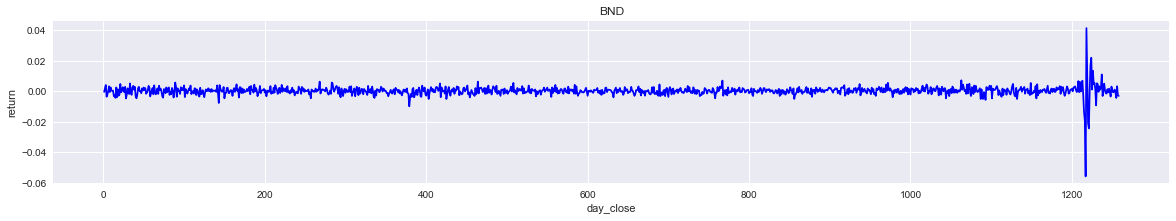

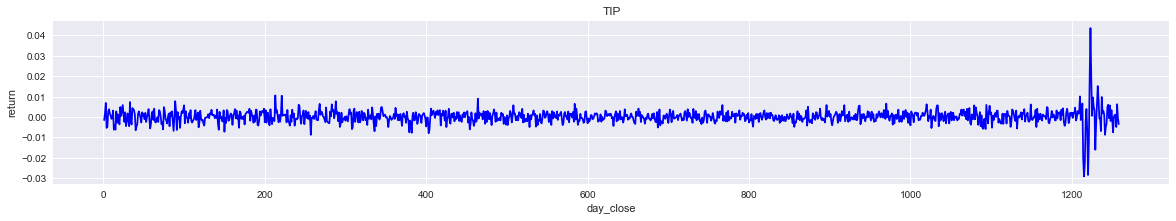

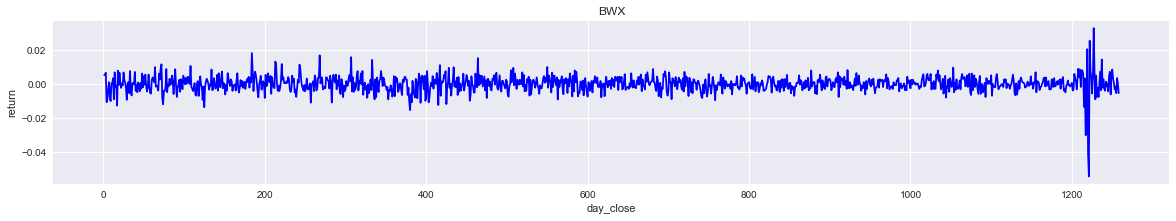

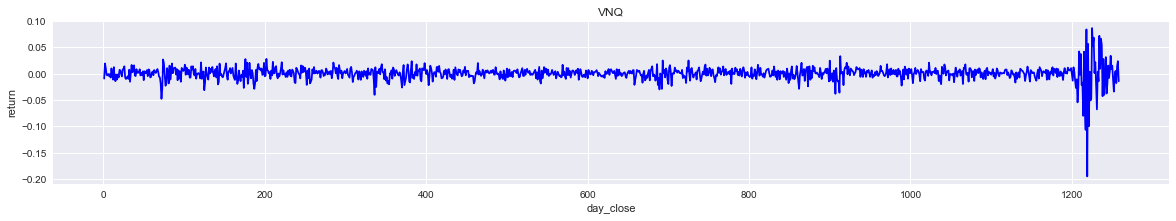

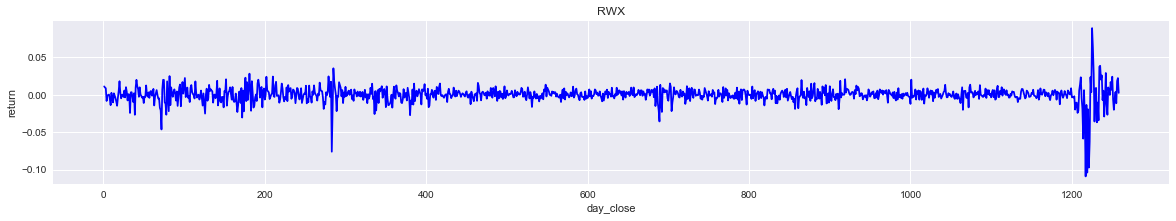

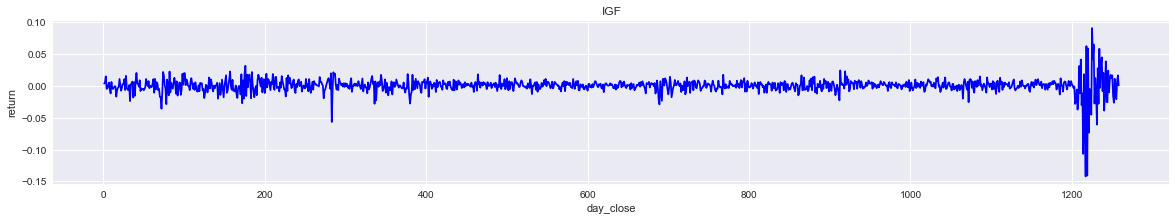

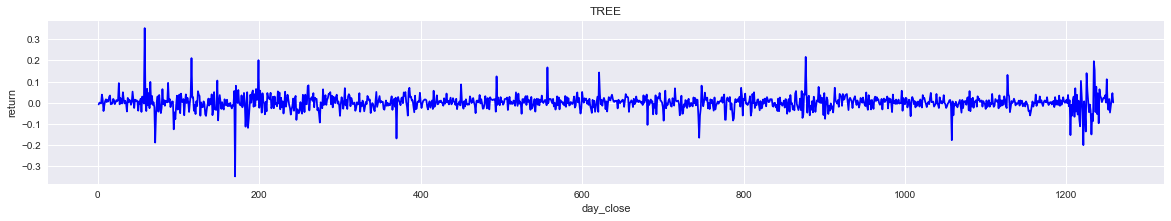

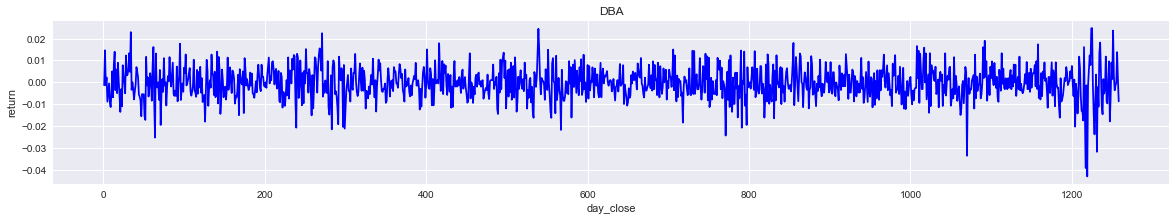

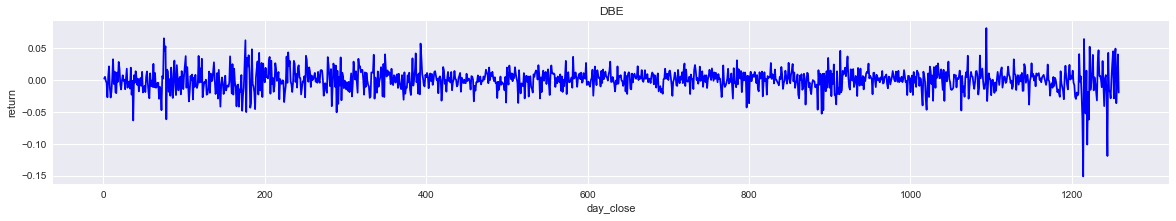

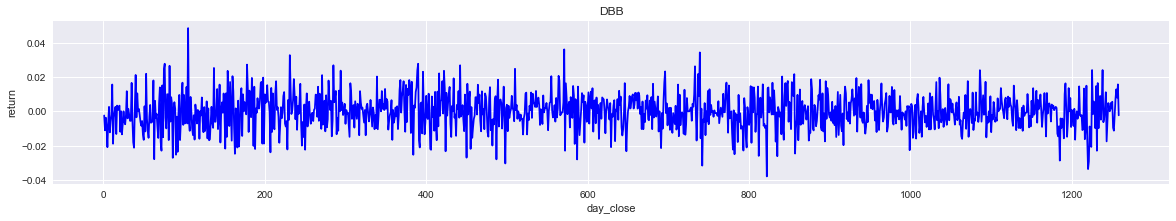

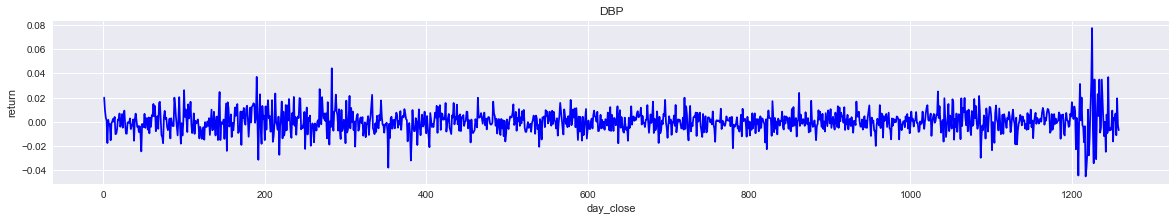

In [677]:
"""
報酬率
"""

for etf in ETF_list:
    plt.figure(figsize=(20, 3)) 
    names["df_%s_ln"%etf] = np.log(names["df_%s"%etf][r"Adj Close"]/names["df_%s"%etf][r"Adj Close"].shift(1))
    plt.plot(names["df_%s_ln"%etf],'b', label=names["df_%s_ln"%etf])
    plt.ylabel('return')
    plt.xlabel('day_close')
    plt.title(etf)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


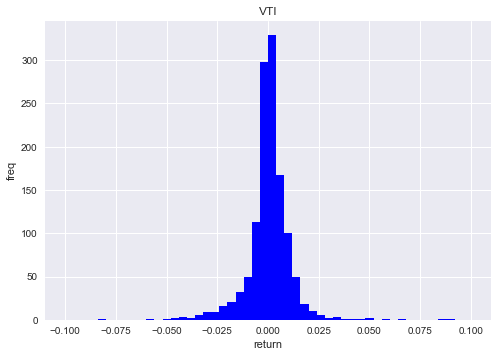

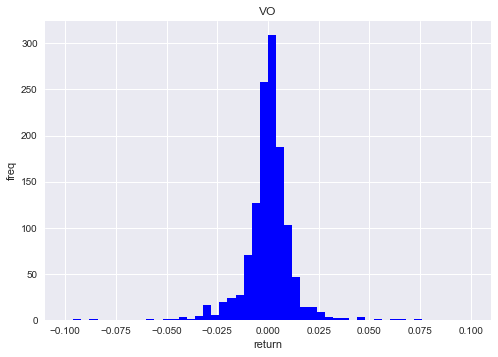

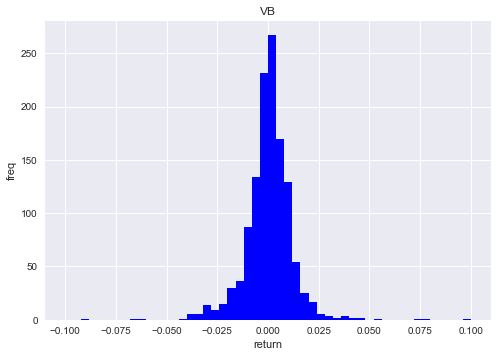

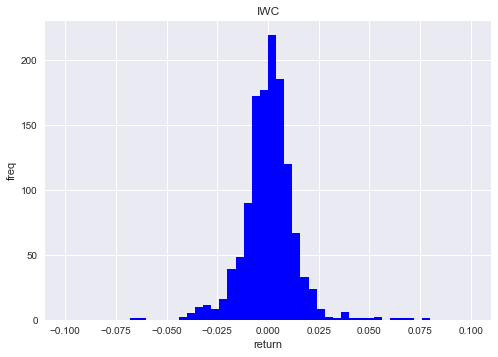

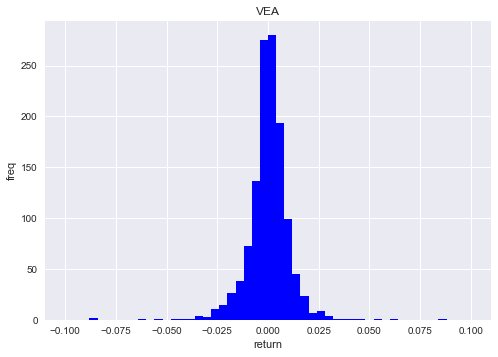

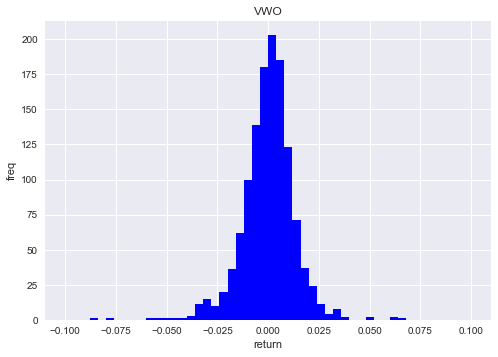

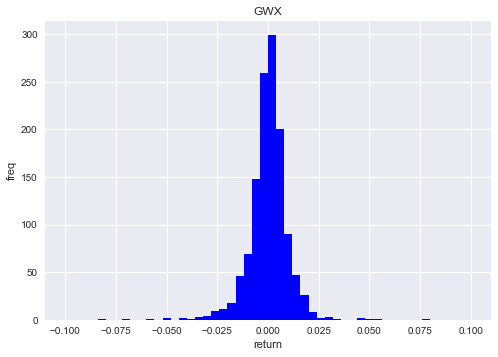

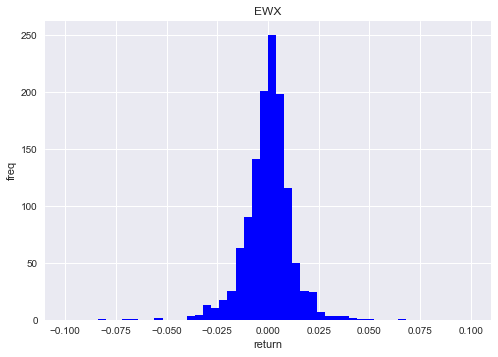

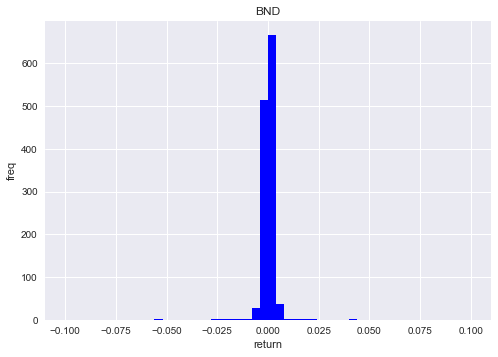

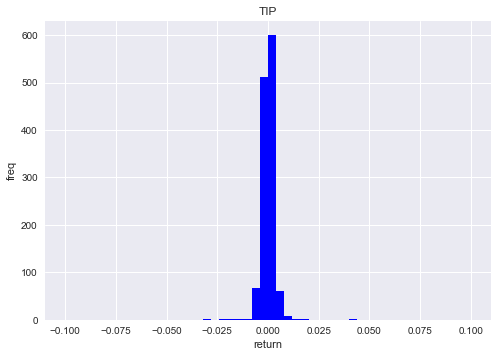

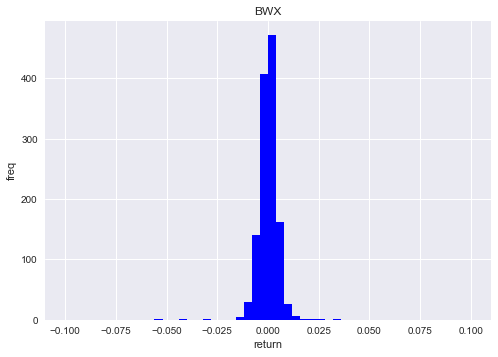

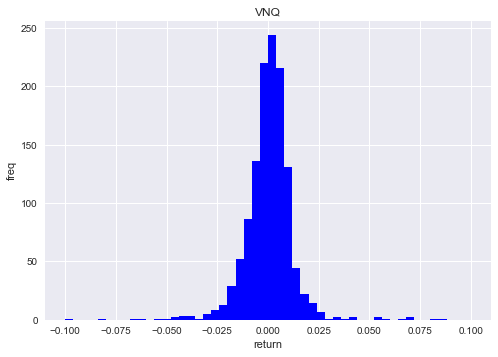

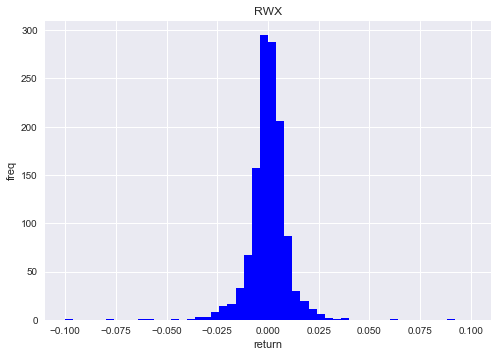

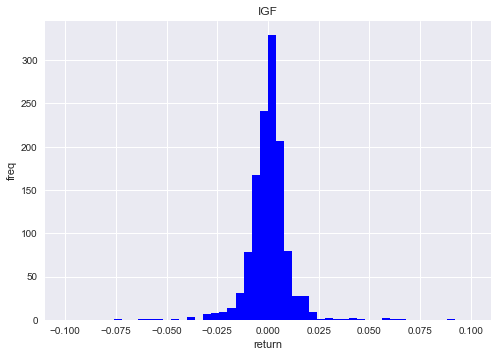

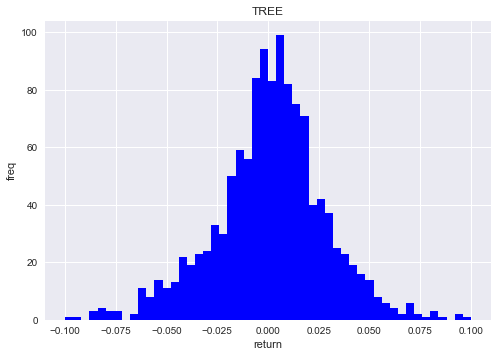

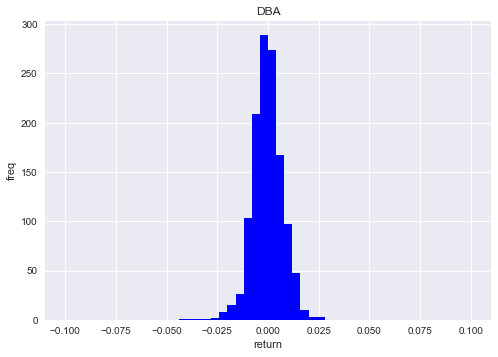

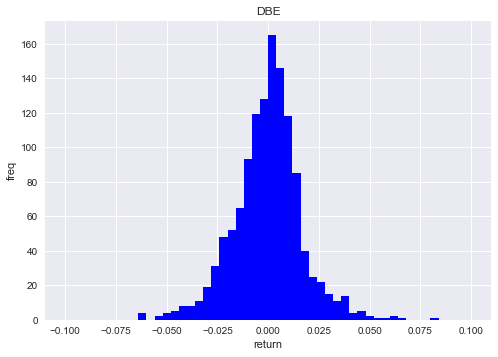

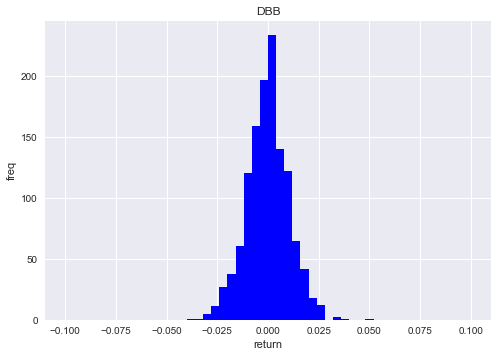

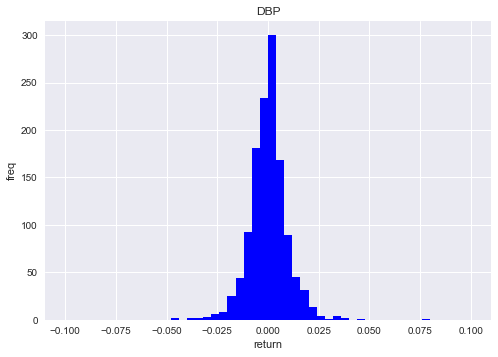

In [678]:
"""
報酬率CDF
"""
for etf in ETF_list:
    plt.hist(names["df_%s_ln"%etf], bins=50, linewidth=1,color="b",range=[-.1,.1])
    plt.title(etf)
    plt.ylabel('freq')
    plt.xlabel('return')
    plt.show()

In [315]:

"""
利用這20檔ETF建構指數,根據每檔ETF與指數之beta嘗試透過資金分配降低系統風險
步驟1.每檔ETF標準化(解決起始值不一致)
步驟2.相加
步驟3.計算每檔ETF與指數之相關係數

其他的波動率,夏普值也是選擇標的的參考之一
"""
for etf in ETF_list:
    profit = (names["df_%s"%etf][r"Adj Close"].iloc[-1] / names["df_%s"%etf][r"Adj Close"].iloc[0] - 1) * 100
    if profit>=0:
        profit = (profit)**(0.2)
    else:
        profit *=-1
        profit = (profit)**(0.2)
        profit *=-1
    
    pct_change = names["df_%s"%etf][r"Adj Close"].pct_change()
    day_profit = pct_change.mean()
    risk = pct_change.std()
    sharpe = day_profit / risk * (252 ** 0.5)

    MDD = (names["df_%s"%etf][r"Adj Close"].cummax() - names["df_%s"%etf][r"Adj Close"]).max()/names["df_%s"%etf][r"Adj Close"].max()*100
    std = (names["df_%s"%etf][r"Adj Close"]/names["df_%s"%etf][r"Adj Close"].shift()).std()
    
    相關係數 = correlation(df_sum,names["std_df_%s"%etf])[0]
    print(etf,"與指數之相關係數為:",相關係數)
    print(etf,"近五年的夏普值是:",sharpe)
    print(etf,"近五年的波動率是:",std)
    print(etf,"近五年的MDD是:",MDD)
    print(etf,"的近五年年化報酬率是:",profit)
    print("-----------------------------------")

VTI 與指數之相關係數為: 0.9304432515493594
VTI 近五年的夏普值是: 0.5214374145067415
VTI 近五年的波動率是: 0.011892731091537838
VTI 近五年的MDD是: 35.000286162096984
VTI 的近五年年化報酬率是: 2.1820046861086295
-----------------------------------
VO 與指數之相關係數為: 0.9605234132786629
VO 近五年的夏普值是: 0.3484812420329754
VO 近五年的波動率是: 0.012505339233047516
VO 近五年的MDD是: 39.37048391859456
VO 的近五年年化報酬率是: 1.9459132322566972
-----------------------------------
VB 與指數之相關係數為: 0.9548908466070353
VB 近五年的夏普值是: 0.27861112409760563
VB 近五年的波動率是: 0.0132228948787251
VB 近五年的MDD是: 42.045821418240344
VB 的近五年年化報酬率是: 1.817014278122356
-----------------------------------
IWC 與指數之相關係數為: 0.8733482422218931
IWC 近五年的夏普值是: 0.17486471101099801
IWC 近五年的波動率是: 0.013964035722946988
IWC 近五年的MDD是: 47.20601131275342
IWC 的近五年年化報酬率是: 1.4820211477186958
-----------------------------------
VEA 與指數之相關係數為: 0.9540250864862608
VEA 近五年的夏普值是: 0.09532766258518126
VEA 近五年的波動率是: 0.01152767713402976
VEA 近五年的MDD是: 35.73509381358524
VEA 的近五年年化報酬率是: 0.7504135940002253
--------------------

In [679]:
"""
合併成1分
"""
合併 = df_VTI.iloc[:,[0]]
for etf in ETF_list:
    合併 = pd.merge(合併, names["df_%s"%etf].iloc[:,[0,5]].rename(columns={'Adj Close':'Adj Close_%s'%etf}), how='left', on='Date')

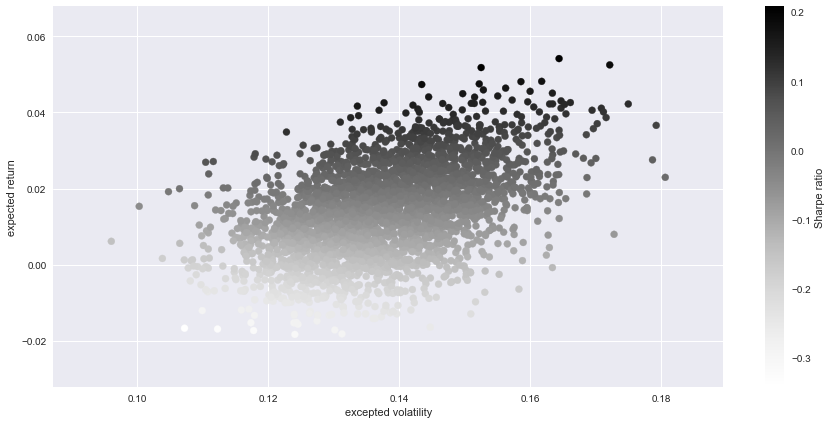

In [463]:

"""
蒙地卡羅
port_returns儲存報酬率
port_variance儲存變異度
weights_list儲存每次權重
重複3000次
無風險利率設2%
"""
noa = len(ETF_list)
port_returns = []
port_variance = []
weights_list = []
risk_free = 0.02 

returns = np.log(合併.iloc[:,1:20] / 合併.iloc[:,1:20].shift(1))

returns.mean()*252


for p in range(3000):

    weights = np.random.random(noa)

    weights /=np.sum(weights)

    weights_list.append(weights)
    port_returns.append(np.sum(returns.mean()*252*weights))

    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))))

port_returns = np.array(port_returns)

port_variance = np.array(port_variance)




plt.figure(figsize = (15,7))

plt.scatter(port_variance, port_returns, c=(port_returns-risk_free)/port_variance, marker = 'o')

plt.grid(True)

plt.xlabel('excepted volatility')

plt.ylabel('expected return')

plt.colorbar(label = 'Sharpe ratio')

In [475]:
"""
找出夏普值最高的那個投資組合的那個權重
"""
asd = 0
print("投組最佳權重是:")
for etf in ETF_list:
    print(etf,"投資",weights_list[np.where(c==np.max(c))[0][0]][asd])
    asd+=1

投組最佳權重是:
VTI 投資 0.013499605569290056
VO 投資 0.07577918426047563
VB 投資 0.022028684453587775
IWC 投資 0.01172312067733893
VEA 投資 0.05482927862067094
VWO 投資 0.07132593400070893
GWX 投資 0.05742056246900919
EWX 投資 0.04883186397689259
BND 投資 0.01394035829096226
TIP 投資 0.0836904685160662
BWX 投資 0.002406436731971641
VNQ 投資 0.054859129820172645
RWX 投資 0.08472119932442178
IGF 投資 0.06812229804793275
TREE 投資 0.08972128673208557
DBA 投資 0.01963553431433332
DBE 投資 0.1004520054942369
DBB 投資 0.05277904707465395
DBP 投資 0.07423400162518902


In [481]:
面試考題第二題 = pd.read_csv(r"C:\Users\user\Desktop\class\金融\台新作業\面試考題第二題工作表1.csv")

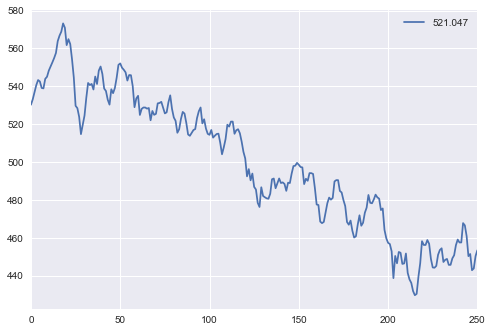

In [680]:
#原始數列資料
面試考題第二題.plot()

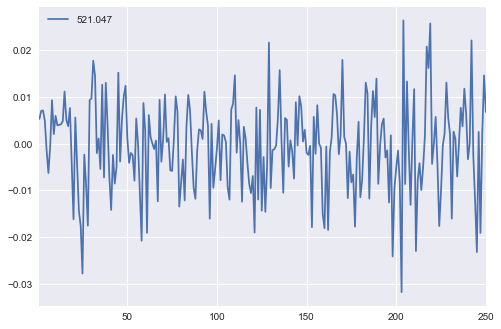

In [681]:
#日報酬
日報酬 = np.log(面試考題第二題 / 面試考題第二題.shift(1))
日報酬 = 日報酬.dropna()
日報酬.plot()

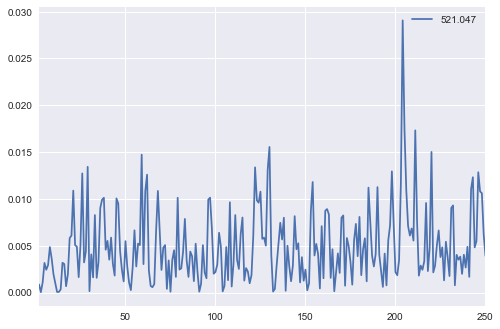

In [525]:
#日波動率
roller = 日報酬.rolling(2)
volList = roller.std(ddof=0)
volList = volList.dropna()
volList.plot()

In [683]:
#日報酬與日波動自相關檢定(durbin_watson)
print("報酬率杜賓檢定結果,P值為",sm.stats.stattools.durbin_watson(日報酬, axis=0)[0],"無法拒絕虛無,無法說明有自我相關")
print("波動率杜賓檢定結果,P值為",sm.stats.stattools.durbin_watson(volList, axis=0)[0],"在顯著邊緣,可能有波動率群聚現象")

報酬率杜賓檢定結果,P值為 1.7254249860776811 無法拒絕虛無,無法說明有自我相關
波動率杜賓檢定結果,P值為 0.5287961326212536 在顯著邊緣,可能有波動率群聚現象


In [684]:
"""
轉為周資料
"""
面試考題第二題_周= pd.DataFrame()
for i in range(len(面試考題第二題)):
    if i%5==0:
        面試考題第二題_周 = 面試考題第二題_周.append(面試考題第二題[i:i+1])

報酬率杜賓檢定結果,P值為 2.3845671104816613 無法拒絕虛無,無法說明有自我相關
波動率杜賓檢定結果,P值為 0.2709246853149911 拒絕虛無,說明有波動率群聚


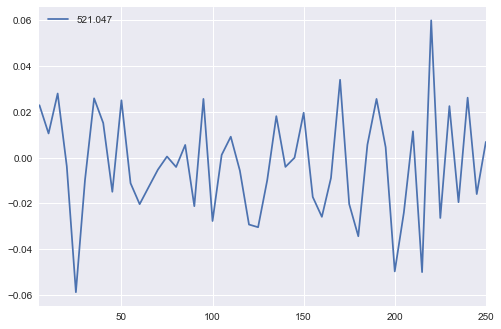

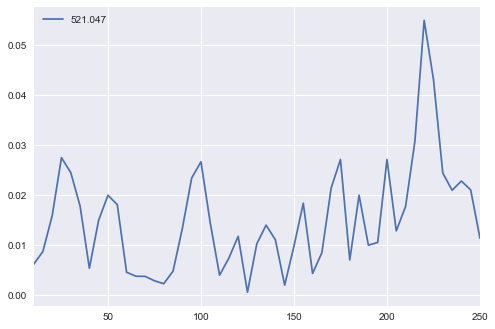

In [685]:
#周報酬率
周報酬 = np.log(面試考題第二題_周 / 面試考題第二題_周.shift(1))
周報酬 = 周報酬.dropna()
周報酬.plot()

#周波動率
roller = 周報酬.rolling(2)
volList_week = roller.std(ddof=0)
volList_week = volList_week.dropna()
volList_week.plot()
print("報酬率杜賓檢定結果,P值為",sm.stats.stattools.durbin_watson(周報酬, axis=0)[0],"無法拒絕虛無,無法說明有自我相關")
print("波動率杜賓檢定結果,P值為",sm.stats.stattools.durbin_watson(volList_week, axis=0)[0],"拒絕虛無,說明有波動率群聚")

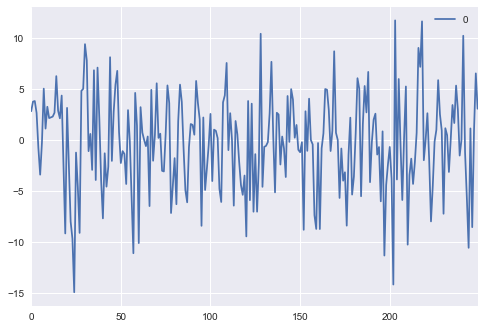

In [644]:
"""
去除時間趨勢
"""
去除趨勢=[]
for i in range(1,len(面試考題第二題)):
    value = 面試考題第二題.iloc[i][0]-面試考題第二題.iloc[i-1][0]
    去除趨勢.append(value)
去除趨勢 = pd.DataFrame(去除趨勢)
去除趨勢.plot()

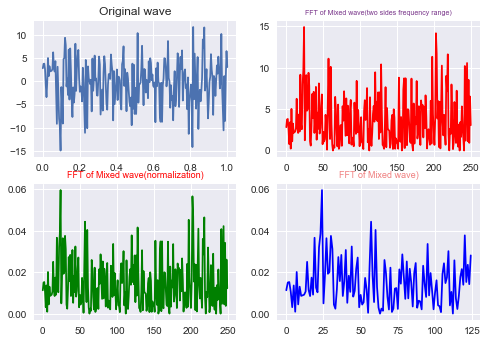

In [688]:
"""
用FFT找是否具有季節性
由於是對稱的,因此看右下圖即可
"""

x=np.linspace(0,1,len(去除趨勢)) 
 
yy=fft(去除趨勢)      #快速傅立葉變換
yreal = yy.real    # 獲取實數部分
yimag = yy.imag    # 獲取虛數部分
 
yf=abs(fft(去除趨勢))    # 取絕對值
yf1=abs(fft(去除趨勢))/len(x)   #歸一化處理
yf2 = yf1[range(int(len(x)/2))] #由於對稱性，只取一半區間
 
xf = np.arange(len(去除趨勢))  # 頻率
xf1 = xf
xf2 = xf[range(int(len(x)/2))] #取一半區間
 
plt.subplot(221)
plt.plot(x[0:len(去除趨勢)],去除趨勢[0:len(去除趨勢)])
plt.title('Original wave')
 
plt.subplot(222)
plt.plot(xf,yf,'r')
plt.title('FFT of Mixed wave(two sides frequency range)',fontsize=7,color='#7A378B') #注意這裡的顏色可以查詢顏色程式碼表
 
plt.subplot(223)
plt.plot(xf1,yf1,'g')
plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')
 
plt.subplot(224)
plt.plot(xf2,yf2,'b')
plt.title('FFT of Mixed wave)',fontsize=9,color='#F08080')
 
plt.show()

Text(0.5, 1.0, 'FFT of Mixed wave)')

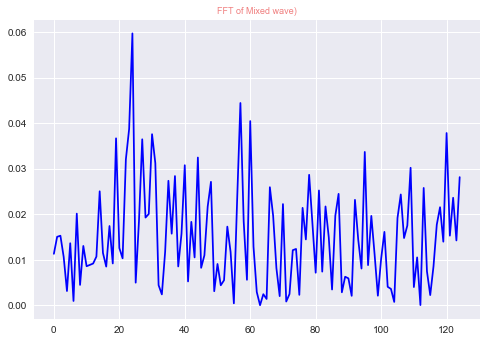

In [689]:
#右下圖,可見週期性不明顯,可能約莫25天是個頻率
plt.subplot()
plt.plot(xf2,yf2,'b')
plt.title('FFT of Mixed wave)',fontsize=9,color='#F08080')